<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Load_Image_Data_for_ML_Model_(GRAYSCALE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!unzip "Cat.zip"
!unzip "Dog.zip"

Archive:  Cat.zip
   creating: Cat/
  inflating: Cat/0.jpg               
  inflating: Cat/1.jpg               
  inflating: Cat/10.jpg              
  inflating: Cat/11.jpg              
  inflating: Cat/12.jpg              
  inflating: Cat/13.jpg              
  inflating: Cat/14.jpg              
  inflating: Cat/15.jpg              
  inflating: Cat/16.jpg              
  inflating: Cat/17.jpg              
  inflating: Cat/18.jpg              
  inflating: Cat/19.jpg              
  inflating: Cat/2.jpg               
  inflating: Cat/20.jpg              
  inflating: Cat/21.jpg              
  inflating: Cat/22.jpg              
  inflating: Cat/23.jpg              
  inflating: Cat/24.jpg              
  inflating: Cat/3.jpg               
  inflating: Cat/4.jpg               
  inflating: Cat/5.jpg               
  inflating: Cat/6.jpg               
  inflating: Cat/7.jpg               
  inflating: Cat/8.jpg               
  inflating: Cat/9.jpg               
Archive:  Dog.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


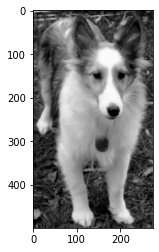

In [16]:
DIR = "Images"
CATEGORIES = ['Dog', 'Cat']

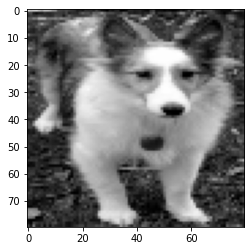

In [22]:
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

## Define a function for creating training data

In [25]:
def create_training_data(directory, categories):
  training_data = []
  for category in categories:
    path = os.path.join(directory, category)
    class_num = categories.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass
  return training_data

In [27]:
train_data = create_training_data(DIR, CATEGORIES)
print(len(train_data))

50


## Shuffle training data

In [ ]:
import random

random.shuffle(train_data)

## Extract Feature set and label set

In [35]:
X = []
y = []

In [37]:
for features, label in train_data:
  X.append(features)
  y.append(label)

In [38]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

## Export datasets into pickle file

In [42]:
import pickle

pickle.dump(X, open("X.pickle", "wb"))
pickle.dump(y, open("y.pickle", "wb"))

## Import pickle file

In [43]:
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)
pickle_in.close()

In [46]:
X[1]

array([[[109],
        [103],
        [102],
        ...,
        [ 89],
        [ 83],
        [ 70]],

       [[126],
        [114],
        [136],
        ...,
        [ 99],
        [ 69],
        [ 87]],

       [[129],
        [125],
        [161],
        ...,
        [ 99],
        [122],
        [100]],

       ...,

       [[169],
        [151],
        [130],
        ...,
        [250],
        [246],
        [250]],

       [[152],
        [141],
        [140],
        ...,
        [243],
        [245],
        [246]],

       [[144],
        [153],
        [149],
        ...,
        [252],
        [247],
        [246]]], dtype=uint8)